<b> Final Project I590 Part I - Danny Rigdon, Harshal Pandit, Siddarth Gokhale </b>



In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
#load data file
bcw = pd.read_csv('Breast-Cancer-Wisconsin.csv')

In [3]:
#print some of the datafile out to ensure it loaded and see if it looks appropriate
bcw.head()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
#Replace ? by NaN in column A7. 
bcw['A7'] = bcw['A7'].replace('?', np.NaN)

In [5]:
#column needs to be converted back to numeric. 
bcw['A7'] = pd.to_numeric(bcw['A7'], errors='coerce')

In [6]:
#Report how many NaN. Use isnull() function applied to the dataframe. 
bcw.isnull()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#Then you can use arithmetic sum(). 
#[Remember to use print() statement to report]
print(bcw['A7'].isnull().sum())

16


In [8]:
#Replace NaN values with the mean of column A7. Use fillna() - find how to calculate mean of the column, 
#add a parameter skipna=TRUE. Apply this function to the entire df - you do not need to specify here column A7

#add column wise fill na prior to applying the mean


#update to just include A2 - CLASS with square brackets*

bcw_clean = bcw[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS']].mean(skipna=True)

In [9]:
bcw_clean = bcw[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS']].fillna(bcw.mean(skipna=True, numeric_only=True))


In [10]:
#summary statistics 
bcw_clean[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS']].describe()


,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
#Find number of columns and number of rows
bcw.shape

(699, 11)

In [12]:
#Report how many unique id values (column Scn) - hint the length of unique ids

len(bcw['Scn'].unique())


645

In [13]:
#print out column titles to see where to subset
bcw.columns

Index(['Scn', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS'], dtype='object')

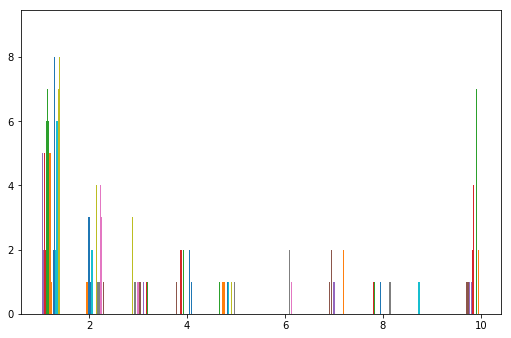

In [44]:
#Draw histograms for columns A2-A10
bcw_subset = bcw[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]
plt.hist(bcw_subset, bins=20)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

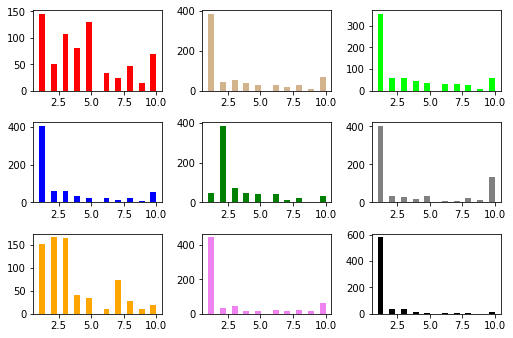

In [72]:
#Draw histograms for columns A2-A10 - histograms as subplots
fig, axes = plt.subplots(nrows=3, ncols=3)
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()

ax0.hist(bcw['A2'], histtype='bar', color='red', bins=20)

ax1.hist(bcw['A3'], histtype='bar',color='tan', bins=20)

ax2.hist(bcw['A4'], histtype='bar',color='lime',bins=20)

ax3.hist(bcw['A5'], histtype='bar',color='blue',bins=20)

ax4.hist(bcw['A6'], histtype='bar',color='green',bins=20)

ax5.hist(bcw['A7'], histtype='bar',color='gray',bins=20)

ax6.hist(bcw['A8'], histtype='bar',color='orange',bins=20)

ax7.hist(bcw['A9'], histtype='bar',color='violet',bins=20)

ax8.hist(bcw['A10'], histtype='bar',color='black',bins=20)

fig.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

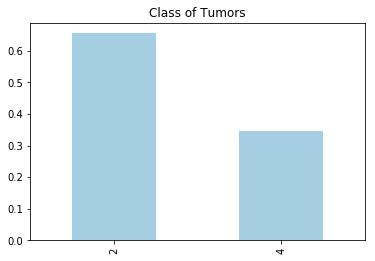

In [33]:
#Draw a bar plot for CLASS - you can use groupby to see counts of benign and malignant values or you can count 
#values directly using pd.value_counts() function and apply it to plot.bar() function.
bcw['CLASS'].value_counts('CLASS').plot(kind = "bar", title="Class of Tumors", colormap='Paired')

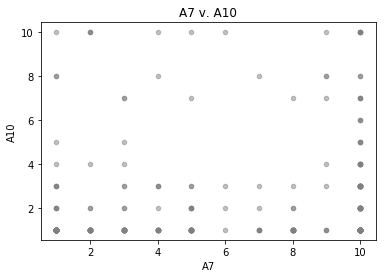

In [45]:
#Draw a scatterplot of any two columns. 
bcw.plot.scatter(x='A7',y='A10', c='gray', alpha = 0.5, title="A7 v. A10")

#Summarize by reporting which values might need standardization in the future (too much variation) and any other observations that you may discover as a Data Scientist.

We found a number of areas that may benefit from additional standardization in the future. The strongest case was A10 - where 99% of benign tumors rated between 1 and 2, and 79% of malignant tumors rated 1-3. This overlap would make it difficult to find any correlation in the data, and indicates that additional guidelines on rating may allow better analysis.  

Some additional observations include: Column A2 seems distributed from range 1-4 at 77% for benign and for malignant 87% is between 5-10.  A3 is similar with 83% of benign tumors at a 1 rating, and 71% of the malignant at 5-10.  Columns A5 and A6 have the largest distribution of scores from 1-10 and may benenfit from more standardization.    

Observations that may be discovered as a Data Scientist:

Point 1:
    Malignancy is generally distributed as a whole
    Mitoses tumors are concentrated between values 1-3
    Individual splits in the image

Point 2:
    We should be able to find two clusters based on the columns as features
    
    